# Programming for Data Science Practical Examination
## Introduction 

The challenge of this pratical is to explore the public procurement data available in the portal www.base.gov.pt. <br>
Public Procurements are contracts establish between a public institutions (the issuer of a procurement) and a third-party supplier. <br>
Each contract is classified using the Common Procurement Vocabulary (CPV). The CPV classification aims at establishing a single classification system for public procurement in Europe, helping in comparative statistics and regulation. The CPV is a five level hierarchical classification encoded in a nine digit string. For instance the first two digits identify the division, the first three the groups, and so on. You can find more information about the CPVs at https://simap.ted.europa.eu/cpv


We will use a sample dataset extracted from the portal BASE (www.base.gov.pt) that contains information on public procurements executed between 2012 and 2014. Below you can find a step-by-step instructions of what the tasks you need to perform in order to analyse this dataset. Each step indicates the amount of points you can score. Make sure you comment all your code and provide, when requested, a discussion about what you have done and the results obtained.

This examination does not intend to test your ability to:<br>
. perform complex data analysis;<br>
. develop complex data-driven models; <br>
. write optimal algorithmic solutions to a problem. <br>

**Instead**, it aims to test your ability to implement a pre-planned step by step project in python.

Your submission will be graded according to the following guidelines:
1. Execution (does your program does what is asked from the exercise?)
2. Objectivity (are you using the adequate libraries? are you using a libraries not in the scope of exercise?)
3. Readibility of your code (is your code correctly documented? is variable naming adequate?)

This is an individual activity!

## Submission Details

The deadline for the submission is November 1st at 23:59, and submission must be done through the corresponding activity in moodle. Your submission should consist of an archive (zip file) containing the following files: <br>
1) A copy of this notebook with your answers; <br>
2) A html version of the notebook with your answers (File -> Download As -> html); <br>
3) An Authorship Statement; <br> 

Submissions done in .rar archives will not be graded. <br>
Submissions delivered that are not in a jupyter notebook format will not be graded.

Good Luck, and enjoy!

**PLEASE FILL THIS INFORMATION IN:** <br>

In [1]:
# Student ID: Guilherme Neves
# Student Name: R20170749

## Boilerplate

Before you start, let us make sure you have all the necessary packages in your working environment. To that end run the following cells to install and load all the necessary libraries.

**Note** You only need to run this cell once, not everytime you open the notebook.

In [2]:
import sys
!{sys.executable} -m pip install --upgrade pip --user
!{sys.executable} -m pip install xlrd
!{sys.executable} -m pip install requests
!{sys.executable} -m pip install seaborn

Requirement already up-to-date: pip in c:\users\guiat\appdata\roaming\python\python38\site-packages (20.2.4)


Then we load the necessary libraries to execute each of the steps below.

In [3]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels as sm
import os
from zipfile import ZipFile

In [4]:
import requests

In [5]:
print('Pandas version ',pd.__version__)
print('Numpy version ',np.__version__)
print('Scipy version ',sp.__version__)
print('Seaborn version ',sns.__version__)
print('StatsModels version ',sm.__version__)

Pandas version  1.0.5
Numpy version  1.18.5
Scipy version  1.5.0
Seaborn version  0.10.1
StatsModels version  0.11.1


In the following steps, please used the alias defined at this step. This will help us to correct your answers and track your steps. Students that fail to use the pre-defined aliases will be incur in a penalization. 

Finally, the following cell downloads the dataset for this project. <br>

In [6]:
r = requests.get('https://www.dropbox.com/s/r5hknwep5nq2gu9/PDS2020_Data.zip?dl=1', allow_redirects=True)
open('Data.zip', 'wb').write(r.content);
with ZipFile('Data.zip', 'r') as zipObj:
    zipObj.extractall('DATA')

The above code will store the datafiles in a folder called "DATA" that is in the same filepath as this notebook. <br>
The dataset consists of three xlsx files containing all contracts available in 2018 concerning the contracts issued in 2012, 2013, and 2014 that where available in BASE.

## Exercises (The action starts here)

<b>[Step 1. | 0.5 points ]</b> Load all the procurement datafiles (contratos2012.xlsx, contratos2013.xlsx, and contratos2014.xlsx) into a single dataframe named <i>data</i>.<br>
Notes: This operation might take a while. When reading data from excel it is safer to always specify the Sheet you want to read. You might need to reset the indexes and drop a column of the final dataframe to obtain a more workable dataframe.

In [7]:
contratos_2012 = pd.read_excel("contratos2012.xlsx", sheet_name='Folha1')
contratos_2013 = pd.read_excel("contratos2013.xlsx", sheet_name='Folha1')
contratos_2014 = pd.read_excel("contratos2014.xlsx", sheet_name='Folha1')

In [8]:
# concatenate the three datsets along the rows, in order to create a new dataframe (data)
data = pd.concat([contratos_2012,contratos_2013,contratos_2014])

data.reset_index(inplace=True)
data.drop('index',axis = 1,inplace=True)
data.head()

,idcontrato,nAnuncio,tipoContrato,tipoprocedimento,objectoContrato,adjudicantes,adjudicatarios,dataPublicacao,dataCelebracaoContrato,precoContratual,cpv,prazoExecucao,localExecucao,fundamentacao
0,85378,4227/2009,Aquisição de serviços,Concurso público,Prestação de Serviços para Elaboração do Plano...,506579425 - Município de Faro,507358830 - Land Design -Paisagismo e Ambiente...,2012-02-21,2012-02-13,103000.00,79421200-3 - Serviços de concepção de projecto...,550,"Portugal, Faro, Faro","Artigo 20.º, n.º 1, alínea b) do Código dos Co..."
1,1308086,4606/2009,Empreitadas de obras públicas,Concurso público,09EPS0073 - Empreitada de construção do novo e...,505587815 - INST GESTAO FINANC INFRA-ESTRUTURA...,"508195985 - Ferreira Edinorte - Sul, ACE",2014-11-24,2012-11-14,5771641.83,45210000-2 - Construção de edifícios,900,"Portugal, Coimbra, Coimbra","Artigo 19.º, alínea b) do Código dos Contratos..."
2,115568,NaN,Aquisição de serviços,Ajuste Direto Regime Geral,PROJECTO DO SISTEMA DE ADUÇÃO E ARMAZENAMENTO ...,"508160570 - VRSA Sociedade de Gestão Urbana, E...","505107929 - FTD, Consultores de Engenharia, Lda.",2012-10-08,2012-09-25,119700.00,71242000-6 - Preparação de projecto e concepçã...,150,"Portugal, Faro, Vila Real Sto Antonio","Artigo 20.º, n.º 1, alínea a) do Código dos Co..."
3,115569,NaN,Aquisição de serviços,Ajuste Direto Regime Geral,O objecto principal é a contratação de serviço...,"508160570 - VRSA Sociedade de Gestão Urbana, E...",501453989 - Ecoserviços - Gestão de Sistemas E...,2012-09-14,2012-08-29,40500.00,71242000-6 - Preparação de projecto e concepçã...,120,"Portugal, Faro, Vila Real Sto Antonio","Artigo 20.º, n.º 1, alínea a) do Código dos Co..."
4,115570,NaN,Aquisição de serviços,Ajuste Direto Regime Geral,PROJECTO DO SISTEMA INTERCEPTOR DE VILA NOVA D...,"508160570 - VRSA Sociedade de Gestão Urbana, E...",504959239 - Cota 200 - Projetos e Consultoria ...,2012-10-04,2012-09-07,36600.00,71242000-6 - Preparação de projecto e concepçã...,120,"Portugal, Faro, Vila Real Sto Antonio","Artigo 20.º, n.º 1, alínea a) do Código dos Co..."


<b>[Step 2. | 0.5 points ]</b> Perform some quick inspection of the data file in order to answer the following questions:
1. How many records does the dataset include?

In [9]:
data.shape[0]

250092

2. What are the fields names?

In [10]:
data.columns

Index(['idcontrato', 'nAnuncio', 'tipoContrato', 'tipoprocedimento',
       'objectoContrato', 'adjudicantes', 'adjudicatarios', 'dataPublicacao',
       'dataCelebracaoContrato', 'precoContratual', 'cpv', 'prazoExecucao',
       'localExecucao', 'fundamentacao'],
      dtype='object')

3. What are the datatypes of each field?

In [11]:
data.dtypes

idcontrato                         int64
nAnuncio                          object
tipoContrato                      object
tipoprocedimento                  object
objectoContrato                   object
adjudicantes                      object
adjudicatarios                    object
dataPublicacao            datetime64[ns]
dataCelebracaoContrato    datetime64[ns]
precoContratual                  float64
cpv                               object
prazoExecucao                      int64
localExecucao                     object
fundamentacao                     object
dtype: object

<b>[Step 3. | 3 points ]</b> As you have probably noticed our raw data is not exactly the cleanest dataset in the block. Indeed, we will need to perform some parsing in order to obtain a good working data. In that sense, write the necessary code to perform the following steps: <br>
1. Break the field <i>cpv</i> into two columns named <i>cpvDOC</i> and <i>CPV</i>.<br>
   The field <i>cpvDOC</i> should retain the CPV id, while the <i>CPV</i> its Description <br>
   For instance, a record with value "72416000-9, Fornecedores de aplicações" should lead to a <i>cpvDOC</i> equal to "72416000-9" and a <i>CPV</i> would be equal to "Fornecedores de aplicações" <br>
Use the head command to display the top 10 rows of these new columns (and only these new columns).

In [12]:
# 'cpvDOC' comprehends all the values in 'cpv', except for all letters and symbols
data['cpvDOC'] = data['cpv'].str.replace("[a-zA-Z\D]",'') 

# I used the blank space as a delimiter for the different cpvDOC numbers, because if I used the '|', it would add that symbol at
# the end to every value with less than 3 different numbers. Furthermore, I defined the threshold of 3 different numbers,
# because there are only just a few rows with more than 3 cpvDOC numbers. Those values will have all the numbers attached to
# each other, except for the first 3 ones, which is turns out to be more difficult to distinguish between different cpvDOC
# numbers.
data['cpvDOC'] = data['cpvDOC'].str[:8] + ' ' + data['cpvDOC'].str[9:17] + ' ' + data['cpvDOC'].str[18:26]

# 'CPV' comprehends all the values in 'cpv', except for all numbers. Despite this, I could not get rid of the '-' and '|'
# symbols.
data['CPV'] = data['cpv'].str.replace("\d+",'')

# delete 'cpv' columns because they are no longer needed, since we add 'cpvDOC' and 'CPV' to the dataframe
data.drop(columns = 'cpv',inplace=True)

# visualize 150 elements at maximum in each value of a column.
pd.options.display.max_colwidth = 150

data.head(10)

,idcontrato,nAnuncio,tipoContrato,tipoprocedimento,objectoContrato,adjudicantes,adjudicatarios,dataPublicacao,dataCelebracaoContrato,precoContratual,prazoExecucao,localExecucao,fundamentacao,cpvDOC,CPV
0,85378,4227/2009,Aquisição de serviços,Concurso público,Prestação de Serviços para Elaboração do Plano de Urbanização do Areal Gordo,506579425 - Município de Faro,"507358830 - Land Design -Paisagismo e Ambiente Ldª. | 508371970 - Site Plan - Consultores em Planeamento e Urbanismo, Lda.",2012-02-21,2012-02-13,103000.00,550,"Portugal, Faro, Faro","Artigo 20.º, n.º 1, alínea b) do Código dos Contratos Públicos",79421200,"- - Serviços de concepção de projectos, excepto projectos de construção"
1,1308086,4606/2009,Empreitadas de obras públicas,Concurso público,09EPS0073 - Empreitada de construção do novo edifício do Instituto de Medicina Legal Coimbra,"505587815 - INST GESTAO FINANC INFRA-ESTRUTURAS JUSTIÇA, IP","508195985 - Ferreira Edinorte - Sul, ACE",2014-11-24,2012-11-14,5771641.83,900,"Portugal, Coimbra, Coimbra","Artigo 19.º, alínea b) do Código dos Contratos Públicos",45210000,- - Construção de edifícios
2,115568,NaN,Aquisição de serviços,Ajuste Direto Regime Geral,PROJECTO DO SISTEMA DE ADUÇÃO E ARMAZENAMENTO DE ÁGUA DE MONTE GORDO,"508160570 - VRSA Sociedade de Gestão Urbana, EM, SA","505107929 - FTD, Consultores de Engenharia, Lda.",2012-10-08,2012-09-25,119700.00,150,"Portugal, Faro, Vila Real Sto Antonio","Artigo 20.º, n.º 1, alínea a) do Código dos Contratos Públicos",71242000,"- - Preparação de projecto e concepção, estimativa de custos"
3,115569,NaN,Aquisição de serviços,Ajuste Direto Regime Geral,O objecto principal é a contratação de serviços para realização do projecto de Adução e Armazenamento de Água de Santa Rita.,"508160570 - VRSA Sociedade de Gestão Urbana, EM, SA","501453989 - Ecoserviços - Gestão de Sistemas Ecológicos, Lda",2012-09-14,2012-08-29,40500.00,120,"Portugal, Faro, Vila Real Sto Antonio","Artigo 20.º, n.º 1, alínea a) do Código dos Contratos Públicos",71242000,"- - Preparação de projecto e concepção, estimativa de custos"
4,115570,NaN,Aquisição de serviços,Ajuste Direto Regime Geral,PROJECTO DO SISTEMA INTERCEPTOR DE VILA NOVA DE CACELA / MANTA ROTA,"508160570 - VRSA Sociedade de Gestão Urbana, EM, SA","504959239 - Cota 200 - Projetos e Consultoria de Engenharia, Lda",2012-10-04,2012-09-07,36600.00,120,"Portugal, Faro, Vila Real Sto Antonio","Artigo 20.º, n.º 1, alínea a) do Código dos Contratos Públicos",71242000,"- - Preparação de projecto e concepção, estimativa de custos"
5,115571,NaN,Aquisição de serviços,Ajuste Direto Regime Geral,PROJECTO DO SISTEMA INTERCEPTOR DE POCINHO / CALIÇO / FONTE SANTA / MANTA ROTA,"508160570 - VRSA Sociedade de Gestão Urbana, EM, SA","504959239 - Cota 200 - Projetos e Consultoria de Engenharia, Lda",2012-10-04,2012-09-07,65800.00,120,"Portugal, Faro, Vila Real Sto Antonio","Artigo 20.º, n.º 1, alínea a) do Código dos Contratos Públicos",71242000,"- - Preparação de projecto e concepção, estimativa de custos"
6,115572,NaN,Aquisição de serviços,Ajuste Direto Regime Geral,LIGAÇÃO DAS REDES DE SANEAMENTO AO LONGO DA FRENTE RIBEIRINHA DA CIDADE DE VILA REAL DE SANTO ANTÓNIO AO SISTEMA INTERCEPTOR DE MANTA ROTA / ALTUR...,"508160570 - VRSA Sociedade de Gestão Urbana, EM, SA","502305401 - Viés - Consultoria, Estudos e Projectos de Engenharia, Lda.",2012-10-04,2012-09-27,44500.00,150,"Portugal, Faro, Vila Real Sto Antonio","Artigo 20.º, n.º 1, alínea a) do Código dos Contratos Públicos",71242000,"- - Preparação de projecto e concepção, estimativa de custos"
7,115573,NaN,Aquisição de serviços,Ajuste Direto Regime Geral,O objecto principal é a contratação de serviços para realização do projecto da Ligação das Redes de Saneamento de Monte Gordo ao Sistema Intercept...,"508160570 - VRSA Sociedade de Gestão Urbana, EM, SA","501453989 - Ecoserviços - Gestão de Sistemas Ecológicos, Lda",2012-09-14,2012-08-29,31000.00,120,"Portugal, Faro, Vila Real Sto Antonio","Artigo 20.º, n.º 

2. Convert any fields with dates to datetime objects. Show the datatypes for all fields after your conversion.<br>
**Tip:** You might want to check Lab 7 for some tips regarding datetime conversion 



In [13]:
# I did not convert any fields with dates to datetime objects because they already were datetime objects, such as 
# 'dataPublicacao' and 'dataCelebracaoContrato'.
data.dtypes

idcontrato                         int64
nAnuncio                          object
tipoContrato                      object
tipoprocedimento                  object
objectoContrato                   object
adjudicantes                      object
adjudicatarios                    object
dataPublicacao            datetime64[ns]
dataCelebracaoContrato    datetime64[ns]
precoContratual                  float64
prazoExecucao                      int64
localExecucao                     object
fundamentacao                     object
cpvDOC                            object
CPV                               object
dtype: object

3. In the fields <i>adjudicantes</i> (issuers) and <i>adjudicatários</i> (suppliers) you should have noticed that it includes both the name and the fiscal numbers (NIF) of the participating institutions.<br>
   For each of those two fields, split each record into two new fields. <br>
   <i>Entidade adjudicante - Nome, NIF</i> split into <i>issuerNIF</i> and <i>issuerName</i>.<br>
   <i>Entidade adjudicatária - Nome, NIF</i> split into <i>supplierNIF</i> and <i>supplierName</i>.<br>
   You will find that in some cases there are multiple entities in those fields, which are separated by "|". Explain how have you worked around such cases? If you are not able to perform this, feel free to ignore/drop the records that have multiple entities in each of those fields, but report what is the percentage of procurements that you would be dropping.

In [14]:
# create issuerNIF, which only includes the numbers from 'adjudicantes', therefore removing all letters and symbols, including
# '|', but I could not find a way to keep it as a delimiter of two numbers.
data['issuerNIF'] = data['adjudicantes'].str.replace("[a-zA-Z\D]",'') 

# 'issuerName' comprehends all the values in 'adjudicantes', except for all numbers. Despite this, I could not get rid of the 
# '-', at the beginning of each issuer Name.
data['issuerName'] = data['adjudicantes'].str.replace("\d+",'')

# create supplierNIF, which only includes the numbers from 'adjudicatarios', therefore removing all letters and symbols, 
# including '|', but I could not find a way to keep it as a delimiter of two numbers. Instead, I used the blank space as a
# delimiter for two numbers.
data['supplierNIF'] = data['adjudicatarios'].str.replace("[a-zA-Z\D]",'')
data['supplierNIF'] = data['supplierNIF'].str[:9] + ' ' + data['supplierNIF'].str[9:18] + ' ' + data['supplierNIF'].str[18:27]

# 'supplierName' comprehends all the values in 'adjudicatarios', except for all numbers. Despite this, I could not get rid of 
#the '-', at the beginning of each supplier Name.
data['supplierName'] = data['adjudicatarios'].str.replace("\d+",'')

# delete 'adjudicantes' and 'adjudicatarios' columns because they are no longer needed, since we add 'issuerNIF', 'issuerName',
# 'supplierNIF' and 'supplierName' to the dataframe
data.drop(columns = ['adjudicantes','adjudicatarios'],inplace=True)

pd.options.display.max_colwidth = 150

4. Verify that the parsing was successful 

In [15]:
data.loc[:,:].head(50)

,idcontrato,nAnuncio,tipoContrato,tipoprocedimento,objectoContrato,dataPublicacao,dataCelebracaoContrato,precoContratual,prazoExecucao,localExecucao,fundamentacao,cpvDOC,CPV,issuerNIF,issuerName,supplierNIF,supplierName
0,85378,4227/2009,Aquisição de serviços,Concurso público,Prestação de Serviços para Elaboração do Plano de Urbanização do Areal Gordo,2012-02-21,2012-02-13,103000.00,550,"Portugal, Faro, Faro","Artigo 20.º, n.º 1, alínea b) do Código dos Contratos Públicos",79421200,"- - Serviços de concepção de projectos, excepto projectos de construção",506579425,- Município de Faro,507358830 508371970,"- Land Design -Paisagismo e Ambiente Ldª. | - Site Plan - Consultores em Planeamento e Urbanismo, Lda."
1,1308086,4606/2009,Empreitadas de obras públicas,Concurso público,09EPS0073 - Empreitada de construção do novo edifício do Instituto de Medicina Legal Coimbra,2014-11-24,2012-11-14,5771641.83,900,"Portugal, Coimbra, Coimbra","Artigo 19.º, alínea b) do Código dos Contratos Públicos",45210000,- - Construção de edifícios,505587815,"- INST GESTAO FINANC INFRA-ESTRUTURAS JUSTIÇA, IP",508195985,"- Ferreira Edinorte - Sul, ACE"
2,115568,NaN,Aquisição de serviços,Ajuste Direto Regime Geral,PROJECTO DO SISTEMA DE ADUÇÃO E ARMAZENAMENTO DE ÁGUA DE MONTE GORDO,2012-10-08,2012-09-25,119700.00,150,"Portugal, Faro, Vila Real Sto Antonio","Artigo 20.º, n.º 1, alínea a) do Código dos Contratos Públicos",71242000,"- - Preparação de projecto e concepção, estimativa de custos",508160570,"- VRSA Sociedade de Gestão Urbana, EM, SA",505107929,"- FTD, Consultores de Engenharia, Lda."
3,115569,NaN,Aquisição de serviços,Ajuste Direto Regime Geral,O objecto principal é a contratação de serviços para realização do projecto de Adução e Armazenamento de Água de Santa Rita.,2012-09-14,2012-08-29,40500.00,120,"Portugal, Faro, Vila Real Sto Antonio","Artigo 20.º, n.º 1, alínea a) do Código dos Contratos Públicos",71242000,"- - Preparação de projecto e concepção, estimativa de custos",508160570,"- VRSA Sociedade de Gestão Urbana, EM, SA",501453989,"- Ecoserviços - Gestão de Sistemas Ecológicos, Lda"
4,115570,NaN,Aquisição de serviços,Ajuste Direto Regime Geral,PROJECTO DO SISTEMA INTERCEPTOR DE VILA NOVA DE CACELA / MANTA ROTA,2012-10-04,2012-09-07,36600.00,120,"Portugal, Faro, Vila Real Sto Antonio","Artigo 20.º, n.º 1, alínea a) do Código dos Contratos Públicos",71242000,"- - Preparação de projecto e concepção, estimativa de custos",508160570,"- VRSA Sociedade de Gestão Urbana, EM, SA",504959239 200,"- Cota - Projetos e Consultoria de Engenharia, Lda"
5,115571,NaN,Aquisição de serviços,Ajuste Direto Regime Geral,PROJECTO DO SISTEMA INTERCEPTOR DE POCINHO / CALIÇO / FONTE SANTA / MANTA ROTA,2012-10-04,2012-09-07,65800.00,120,"Portugal, Faro, Vila Real Sto Antonio","Artigo 20.º, n.º 1, alínea a) do Código dos Contratos Públicos",71242000,"- - Preparação de projecto e concepção, estimativa de custos",508160570,"- VRSA Sociedade de Gestão Urbana, EM, SA",504959239 200,"- Cota - Projetos e Consultoria de Engenharia, Lda"
6,115572,NaN,Aquisição de serviços,Ajuste Direto Regime Geral,LIGAÇÃO DAS REDES DE SANEAMENTO AO LONGO DA FRENTE RIBEIRINHA DA CIDADE DE VILA REAL DE SANTO ANTÓNIO AO SISTEMA INTERCEPTOR DE MANTA ROTA / ALTUR...,2012-10-04,2012-09-27,44500.00,150,"Portugal, Faro, Vila Real Sto Antonio","Artigo 20.º, n.º 1, alínea a) do Código dos Contratos Públicos",71242000,"- - Preparação de projecto e concepção, estimativa de custos",508160570,"- VRSA Sociedade de Gestão Urbana, EM, SA",502305401,"- Viés - Consultoria, Estudos e Projectos de Engenharia, Lda."
7,115573,NaN,Aquisição de serviços,Ajuste Direto Regime Geral,O objecto principal é a contratação de serviços para realização do projecto da Ligação das Redes de Saneamento de Monte Gordo ao Sistema Intercept...,2012-09-14,2012-08-29,31000.00,120,"Portugal, Faro, Vila Real Sto Antonio","Artigo 20.º, n.º 1, alínea a) do Código dos Contratos Públicos",71242000,"- - Preparação de projecto e concepção, es

<b>[Step 4. | 5 points ]</b> Let us do some exploratory analysis of the data. The goals is to develop some familarity with the data, which we will do by answering some simple questions. Knowing which questions to ask is an important step for any successful data science project. In that sense, write down the necessary code to answer the following questions:

(Report the results using a meaningful visualization.)

1. What is the total value of procurements per month?

Text(0, 0.5, 'Total Value of Procurements')

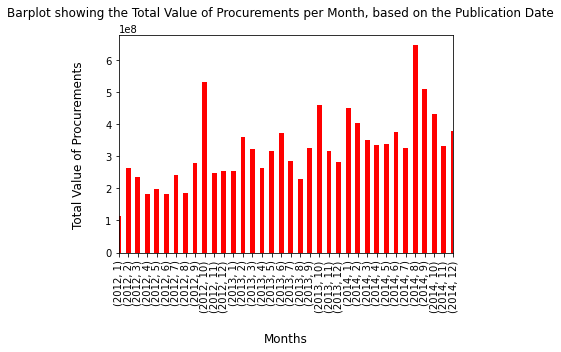

In [16]:
# Draw a barplot showing the total value of procurements per month, taking into account 'dataPublicacao'.
data.groupby([data['dataPublicacao'].dt.year,data['dataPublicacao'].dt.month]).sum()['precoContratual'].plot(kind='bar',color= 'r')

# add a centered title to the plot
plt.suptitle('Barplot showing the Total Value of Procurements per Month, based on the Publication Date')

plt.xlim(1,36)

# add a label to the x and y axes, respectively. labelpad = 20 in order to keep the labels more away and not so attached to the
# numbers in the axes. fontsize = 12 to make the axes' labels easier to read.
plt.xlabel('Months',labelpad = 20,fontsize = 12)
plt.ylabel('Total Value of Procurements',labelpad = 20,fontsize = 12)

Text(0, 0.5, 'Total Value of Procurements')

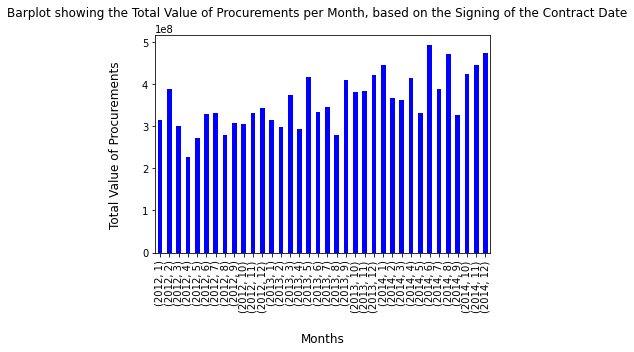

In [17]:
# Draw a barplot showing the total value of procurements per month, taking into account 'dataCelebracaoContrato'.
data.groupby([data['dataCelebracaoContrato'].dt.year,data['dataCelebracaoContrato'].dt.month]).sum()['precoContratual'].plot(kind='bar',color= 'b')

plt.suptitle('Barplot showing the Total Value of Procurements per Month, based on the Signing of the Contract Date')
plt.xlabel('Months',labelpad = 20,fontsize = 12)
plt.ylabel('Total Value of Procurements',labelpad = 20,fontsize = 12)

2. How many procurements have been issued per each month of the year?

Text(0, 0.5, 'Total Number of Procurements')

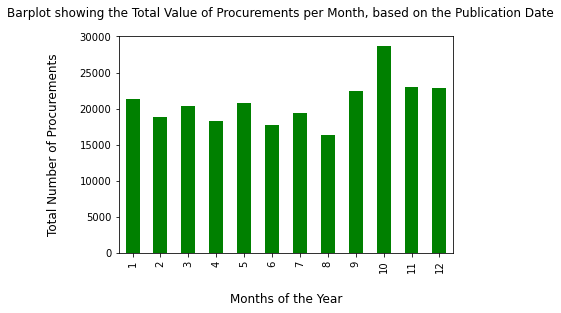

In [18]:
# Draw a barplot showing the total number of procurements per month, taking into account 'dataPublicacao'.
data.groupby([data['dataPublicacao'].dt.month]).count()['dataPublicacao'].plot(kind='bar',color= 'g')

plt.suptitle('Barplot showing the Total Value of Procurements per Month, based on the Publication Date')
plt.xlabel('Months of the Year',labelpad = 20,fontsize = 12)
plt.ylabel('Total Number of Procurements',labelpad = 20,fontsize = 12)

Text(0, 0.5, 'Total Number of Procurements')

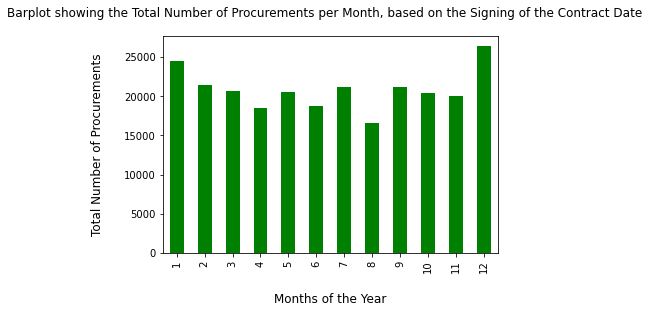

In [19]:
# Draw a barplot showing the total number of procurements per month, taking into account 'dataCelebracaoContrato'.
data.groupby([data['dataCelebracaoContrato'].dt.month]).count()['dataCelebracaoContrato'].plot(kind='bar',color= 'g')

plt.suptitle('Barplot showing the Total Number of Procurements per Month, based on the Signing of the Contract Date')
plt.xlabel('Months of the Year',labelpad = 20,fontsize = 12)
plt.ylabel('Total Number of Procurements',labelpad = 20,fontsize = 12)

# There are more procurements published in the months of September,October and November, while there are more procurements
# whose contract is signed in January, February, July and December

3. What is the distribution of values? In other words, what is the proportion of procurements that have value X?  Can you build a visualization to highlight the what you found more interesting and discuss it? Note: Consider working with the Logarithm base 10 of values; Consider use predefined bin in the X values.

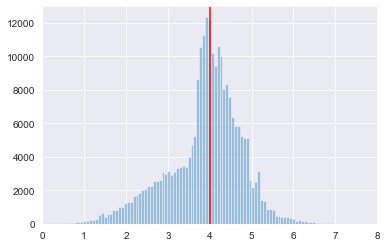

In [20]:
sns.set_style('darkgrid')

plt.axvline(x=np.log10(10000),color='r')
plt.xlim(0,8)

sns.distplot(np.log10(list(filter(lambda x: x>0, data['precoContratual'].values))),bins=150,kde=False)

4. In the dataset, how many issuing Institutions are there? And how many suppliers?

In [21]:
print("There are "+str(data['issuerNIF'].nunique())+" different issuing instituitions.")
print("There are "+str(data['supplierNIF'].nunique())+" different suppliers.")

There are 6046 different issuing instituitions.
There are 44548 different suppliers.


5. What services has ISEGI-Inst Superior de Estatistica e Gestão de Informação da UNL (NIF: 502322152) supplied? And who are the top three issuers/beneficiaries of such services?

In [22]:
data.loc[data['supplierNIF'].str.contains('502322152',na=False),'CPV']

34135                                                       - - Serviços de avaliação dos resultados
58789                          - - Serviços de desenvolvimento de software para sectores específicos
92339                                                           - - Serviços de sondagens de opinião
102338                                                             - - Serviços de ensino e formação
115594                                                      - - Serviços de avaliação dos resultados
124957                - - Serviços de TI: consultoria, desenvolvimento de software, Internet e apoio
137987                                                            - - Serviços de estudos de mercado
147746    - - Serviços de planeamento estratégico para a gestão ou conservação dos recursos naturais
176045                - - Serviços de TI: consultoria, desenvolvimento de software, Internet e apoio
176053                - - Serviços de TI: consultoria, desenvolvimento de software, Interne

In [25]:
from collections import Counter

issuers_ISEGI = data.loc[data['supplierNIF'].str.contains('502322152',na=False),'issuerName']

# returns a tuple with the top 3 of the instituions which benefited from services provided by ISEGI and the corresponding number of 
# services that were provided by ISEGI.
Counter(issuers_ISEGI).most_common(3)

[(' - Instituto Nacional da Propriedade Industrial, I. P.', 3),
 (' - DGAV', 3),
 (' - Instituto Português da Qualidade, I. P.', 2)]

6. What are the top five services (CPV) contracted by Hospital de Santa Maria Maior (NIF: 506361381)?

In [26]:
services_HSMM = data.loc[data['issuerNIF'].str.contains('506361381',na=False),'CPV']
Counter(services_HSMM).most_common(5)

[('- - Medicamentos vários', 23),
 ('- - Medicamentos usados na terapêutica endócrina', 21),
 ('- - Vestuário profissional', 12),
 ('- - Medicamentos para o sangue e para os órgãos hematopoiéticos', 10),
 ('- - Reagentes de laboratório', 8)]

7. What services (CPV) has Novo Banco, S.A. (NIF: 513204016) supplied? Agregate the output by CPV and sort by descending order of total value.

In [27]:
data[data['supplierNIF'].str.contains('513204016',na=False)].groupby('CPV')['precoContratual'].sum().sort_values(ascending=False)

CPV
- - Serviços de banca                    1750800.0
- - Automóveis de passageiros              19918.7
- - Serviços das agências de cobrança      16372.8
Name: precoContratual, dtype: float64

8. Can you measure the correlation between the length/duration of contract ("Prazo de execução") and the final value ("Preço total efetivo")? Are longer contracts more costly?<br>
    8.1 What if you plot the average price per day as a function of the duration of the contract? What relationship to you obtain?

In [28]:
data['precoContratual'].corr(data['prazoExecucao'])
# I can say that, with such a lower correlation, there is no relationship between the length/duration of contract and the final 
# value. So usually, longer contracts are not more costly.

-2.9324734484329357e-05

C:\Users\guiat\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\guiat\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


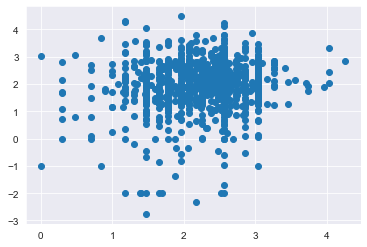

In [67]:
data['pricePerDay'] = (data['precoContratual'] / data['prazoExecucao'])

data['avgPricePerDay'] = data.groupby('prazoExecucao')['pricePerDay'].mean()

data['prazoExecucao'].sort_values().unique()
plt.scatter(np.log10(data['prazoExecucao']),np.log10(data['avgPricePerDay']))

# I can say that the relatioship between the average price per day and duration of the contract is negative, therefore longer
# contracts are cheaper in a daily cost.

<b>[Step 5. | 5 points ]</b> You probably have noticed that our dataset includes procurements issued by municipalities (Câmara Municipal or Município). Interesting huh?

Next, we will explore municipality procurement data a bit more in detail. To that end, we will need to process our procurement dataset, in order to obtain the procurements of each municipality, aggregate the data and obtain the relevant metrics.

However, the data is not uniform as some typos lead to the same municipality having different names. Moreover, there are municipal companies that have a different fiscal code than the municipalities. To make it simple, let us ignore municipal companies. Moreover, we have prepared beforehand a .csv file that lists all the NIF ids associated wit each municipality.

1. Download the file MunicipiosNIF.csv from https://tinyurl.com/y9kjrgqb and load it into a dataframe;

In [30]:
MunicipiosNIF = pd.read_excel("MunicipiosNIF.xlsx")
MunicipiosNIF.head()

,NIF,Municipality
0,500051054,Município de Almada
1,500051062,Município de Sintra
2,500051070,Município de Lisboa
3,500745773,Município de Alcanena
4,500745943,Município de Oeiras


2. Create a new dataframe that contains only the procurements issued by municipalities. Use the dataframe created above to aid your filtering.

Note: you will end up with situations where the same municipality will have different names, although it has the same NIF. Consider using only the NIF as the unique identifier of a municipality, and if there are multiple names associated to it, to choose one. Explain how did you proceed.

In [31]:
# Transform the values in 'NIF' into strings
MunicipiosNIF['NIF'] = MunicipiosNIF['NIF'].astype(str)

# create a new dataframe (munic_proc) which holds all the rows where the issuer NIF of 'data' corresponds to the NIF in 
# 'municipiosNIF'
munic_proc = data[data['issuerNIF'].isin(MunicipiosNIF['NIF'])]

# join 'MunicipiosNIF' and 'munic_proc' on 'issuerNIF', setting 'NIF' as the id of 'MunicipiosNIF'
munic_proc = munic_proc.join(MunicipiosNIF.set_index('NIF'), on='issuerNIF')

# remove the column 'issuerName', because the 'Municipality' column has cleaner values (without '-'). Rename the 'Municipality'
# attached to munic_proc to 'issuerName'.

munic_proc = munic_proc.drop(columns = 'issuerName').rename(columns = {'Municipality': 'issuerName'})
munic_proc

,idcontrato,nAnuncio,tipoContrato,tipoprocedimento,objectoContrato,dataPublicacao,dataCelebracaoContrato,precoContratual,prazoExecucao,localExecucao,fundamentacao,cpvDOC,CPV,issuerNIF,supplierNIF,supplierName,pricePerDay,avgPricePerDay,issuerName
0,85378,4227/2009,Aquisição de serviços,Concurso público,Prestação de Serviços para Elaboração do Plano de Urbanização do Areal Gordo,2012-02-21,2012-02-13,103000.00,550,"Portugal, Faro, Faro","Artigo 20.º, n.º 1, alínea b) do Código dos Contratos Públicos",79421200,"- - Serviços de concepção de projectos, excepto projectos de construção",506579425,507358830 508371970,"- Land Design -Paisagismo e Ambiente Ldª. | - Site Plan - Consultores em Planeamento e Urbanismo, Lda.",187.272727,inf,Município de Faro
11,124837,323/2010,Empreitadas de obras públicas,Concurso público,"Requalificação do campo de futebol da Quinta das Fonsecas - Lomba da Arregaça<br/>Regularização do campo existente, realização de ssistema de capt...",2012-09-26,2012-08-31,268073.66,45,"Portugal, Coimbra, Coimbra","Artigo 19.º, alínea b) do Código dos Contratos Públicos",45212200,- - Construção de instalações desportivas,506415082,500411620,"- PINTO &amp; BRAZ, LDA.",5957.192444,2363.915524,Município de Coimbra
13,134775,847/2010,Aquisição de bens móveis,Concurso público,"Aquisição de contadores de água fria, destinados à instalação no concelho de Palmela",2012-07-09,2012-01-16,42000.00,365,"Portugal, Setúbal, Palmela","Artigo 20.º, n.º 1, alínea b) do Código dos Contratos Públicos",38421100,- - Contadores de água,506187543,504637037,"- FLOW SYSTEMS-SISTEMAS DE MEDIÇÃO DE FLUIDOS UNIPESSOAL, LDA",115.068493,1357.256952,Município de Palmela
20,170263,NaN,Empreitadas de obras públicas,Ajuste Direto Regime Geral,"Estação elevatória na Soalheira, trabalhos complementares no caminho rural do Catrão (Feiteiras) - Alto dos Barbados e arruamentos na Mata da Rainha",2012-04-19,2012-04-05,149351.24,90,"Portugal, Castelo Branco, Fundão","Artigo 19.º, alínea a) do Código dos Contratos Públicos",45000000,- - Construção,506215695,500024898,"- António Lourenço, Lda.",1659.458222,879.851971,Município do Fundão
23,178501,3406/2010,Empreitadas de obras públicas,Concurso público,Construção da Variante da Caranguejeira - 2.º Troço,2012-04-13,2012-04-12,671398.53,548,"Portugal, Leiria, Leiria","Artigo 19.º, alínea b) do Código dos Contratos Públicos",45233120,- - Construção de estradas,505181266,500870578,"- Matos &amp; Neves, limitada",1225.179799,733.736493,Município de Leiria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249713,2538978,NaN,Aquisição de bens móveis,Ao abrigo de acordo-quadro (art.º 259.º),"Aquisição e manutenção de licenciamento de software microsoft, ao abrigo do Acordo Quadro para licenciamento de software n.º 11, celebrado pela Ag...",2016-10-18,2014-10-21,219422.00,365,"Portugal, Lisboa, Lisboa",Artigo 259.º do Código dos Contratos Públicos,48000000,- - Pacotes de software e sistemas de informação,500051070,500074372,"- Axianseu - Digital Solutions, S.A",601.156164,NaN,Município de Lisboa
249723,2607121,NaN,Aquisição de serviços,Ajuste Direto Regime Geral,Serviços jurídicos no âmbito da reprivatização da empresa Geral de Fomento SA,2016-11-02,2014-09-19,24642.84,365,"Portugal, Viana do Castelo, Ponte de Lima","Artigo 20.º, n.º 1, alínea a) do Código dos Contratos Públicos",79100000,- - Serviços jurídicos,506811913,502991771,"- NUNO CEREJEIRA NAMORA, PEDRO MARINHO FALCÃO &amp; ASSOCIADOS - SOCIEDADE DE ADVOGADOS, RL",67.514630,NaN,Município de Ponte de Lima
249809,2950612,NaN,Aquisição de serviços,Ajuste Direto Regime Geral,Serviço Segurança Alimentar,2017-01-26,2014-02-20,2400.00,365,"Portugal, Setúbal, Alcácer do Sal","Artigo 20.º, n.º 1, alínea a) do Código dos Contratos Públicos",71630000,- - Serviços técnicos de inspecção e ensaio,502150319,506517349,"- MCA Segurança Alimentar,Lda",6.575342,NaN,Município de Alcácer do Sal
250003,3776350,NaN,Aquisição de serviços,Ajuste Direto Reg

3. What are the top ten suppliers in terms of value to the municipality of Lisbon?

In [32]:
munic_proc[munic_proc['issuerNIF'].str.contains('500051070')].groupby('supplierName')['precoContratual'].sum().sort_values(ascending=False).head(10)

supplierName
 - Securitas - Serviços e Tecnologia de Segurança, S.A.        7073688.48
 - Habitamega Construções, S.A.                                7043241.58
 - HCI - CONSTRUÇÕES, SA |  - Jular Madeiras, S.A.             6623790.90
 - Euromex, Lda.                                               6323077.34
 - EDP Comercial, SA                                           5823386.23
 - Teixera, Pinto &amp; Soares, S.A.                           4446533.16
 - CONSTRUTORA UDRA, LDA.                                      4442348.00
 - Uniself Sociedade de Restaurantes Públicos e Privados SA    4408763.64
 - VODAFONE PORTUGAL - Comunicações Pessoais, S.A.             4172563.59
 - Controp-Congevia,SA                                         4137710.86
Name: precoContratual, dtype: float64

4. What are the top ten services in terms of value supplied to Lisbon?

In [33]:
munic_proc[munic_proc['issuerNIF'].str.contains('500051070')].groupby('tipoContrato')['precoContratual'].sum().sort_values(ascending=False).head(10)

tipoContrato
Empreitadas de obras públicas                             1.125616e+08
Aquisição de serviços                                     9.246611e+07
Aquisição de bens móveis                                  1.971993e+07
Aquisição de bens móveis | Aquisição de serviços          4.604766e+04
Outros                                                    3.806998e+04
Empreitadas de obras públicas | Sociedade                 2.416320e+04
Locação de bens móveis                                    2.403100e+04
Aquisição de serviços | Sociedade                         1.400000e+04
Sociedade                                                 6.740520e+03
Empreitadas de obras públicas | Locação de bens móveis    5.165000e+03
Name: precoContratual, dtype: float64

5. Compute the average value of the procurements (only those contracted by municipalities) per supplier. Show as an histogram the number of companies that received a total amount X from municipalities. Identify the top 10 companies that received more money from municipalities.

In [34]:
avg_value_per_supplier = munic_proc.groupby('supplierName').mean()['precoContratual'].sort_values(ascending = False)
avg_value_per_supplier

supplierName
 - EGEO - TECNOLOGIA E AMBIENTE, SA. |  - REDE AMBIENTE - ENGENHARIA E SERVIÇOS, S.A.                            35776692.00
 - HCI - CONSTRUÇÕES, SA |  - Jular Madeiras, S.A.                                                                6623790.90
 - CARI CONSTRUTORES SA |  - Domingos da Silva Teixeira, S.A. |  - DTE, INSTALAÇÕES ESPECIAIS, S.A.               4369803.06
 - LUIS FRAZÃO - CONSTRUÇÃO CIVIL E OBRAS PÚBLICAS, S.A. |  - VIBEIRAS - Sociedade Comercial de Plantas, S.A.     3778241.90
 - CONSTRUÇÕES VIEIRA MENDES, LDA. |  - Construções J.J.R. &amp; Filhos, S.A.                                     3664621.00
                                                                                                                    ...     
 - RSA - Reciclagem de Sucatas Abrantina, S.A.                                                                      -3700.00
 - Paulo Jorge Andrade Santos                                                                                   

In [35]:
Total_value_received = munic_proc.groupby('supplierName').sum()['precoContratual'].sort_values(ascending=False)
Total_value_received

supplierName
 - EDP Comercial, SA                                                                     1.384063e+08
 - Galp Energia, SA.                                                                     6.274617e+07
 - Uniself Sociedade de Restaurantes Públicos e Privados SA                              4.563211e+07
 - GERTAL - Companhia Geral de Restaurantes e Alimentação, S.A.                          4.068876e+07
 - EGEO - TECNOLOGIA E AMBIENTE, SA. |  - REDE AMBIENTE - ENGENHARIA E SERVIÇOS, S.A.    3.577669e+07
                                                                                             ...     
 - RSA - Reciclagem de Sucatas Abrantina, S.A.                                          -3.700000e+03
 - Paulo Jorge Andrade Santos                                                           -6.878000e+03
 - GNA - Comércio Alimentar, Lda                                                        -2.055000e+04
 - Burgotertúlia, Lda.                                               

(array([3878., 3274., 1991., 1238.,  960.,  739.,  641.,  580.,  330.,
         292.]),
 array([     0.,  10000.,  20000.,  30000.,  40000.,  50000.,  60000.,
         70000.,  80000.,  90000., 100000.]),
 <a list of 10 Patch objects>)

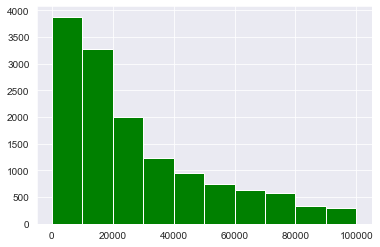

In [36]:
# I chose bins = 10 and range from 0 to 100000 to read the histogram more easily. There are just a few companies which received
# more than 100000 monetary units from municipalities, so I decided not to include them, in order to have a more meaningful
# histogram.

plt.hist(Total_value_received, bins = 10, range=[0, 100000], facecolor='green', align='mid')

# sns.distplot(Total_value_received,hist=True)

In [37]:
munic_proc.groupby('supplierName').mean()['precoContratual'].sort_values(ascending = False).head(10)

supplierName
 - EGEO - TECNOLOGIA E AMBIENTE, SA. |  - REDE AMBIENTE - ENGENHARIA E SERVIÇOS, S.A.                            3.577669e+07
 - HCI - CONSTRUÇÕES, SA |  - Jular Madeiras, S.A.                                                               6.623791e+06
 - CARI CONSTRUTORES SA |  - Domingos da Silva Teixeira, S.A. |  - DTE, INSTALAÇÕES ESPECIAIS, S.A.              4.369803e+06
 - LUIS FRAZÃO - CONSTRUÇÃO CIVIL E OBRAS PÚBLICAS, S.A. |  - VIBEIRAS - Sociedade Comercial de Plantas, S.A.    3.778242e+06
 - CONSTRUÇÕES VIEIRA MENDES, LDA. |  - Construções J.J.R. &amp; Filhos, S.A.                                    3.664621e+06
 - Sociedade de Construções José Coutinho, S.A.                                                                  3.394311e+06
 - Alexandre Barbosa Borges, S. A. |  - Domingos da Silva Teixeira, S.A.                                         3.269070e+06
 - ECOREDE - Engenharia e Serviços, S.A |  - REDE AMBIENTE - ENGENHARIA E SERVIÇOS, S.A.                 

6. What is the most common "tipo de procedimento" of procurements issued by municipalities? <br>
    6.1 What if you consider only procurements with a value above 50 000 euros? <br>
    6.2 How do you relate these results with those obtained in Question 3 of Step 4?

In [38]:
munic_proc.groupby('tipoprocedimento')['tipoprocedimento'].count().sort_values(ascending=False).head(1)

tipoprocedimento
Ajuste Direto Regime Geral    55405
Name: tipoprocedimento, dtype: int64

In [39]:
munic_proc_higher_5000 = munic_proc[munic_proc['precoContratual'] > 50000]
munic_proc_higher_5000.groupby('tipoprocedimento')['tipoprocedimento'].count().sort_values(ascending=False).head(1)

tipoprocedimento
Ajuste Direto Regime Geral    7935
Name: tipoprocedimento, dtype: int64

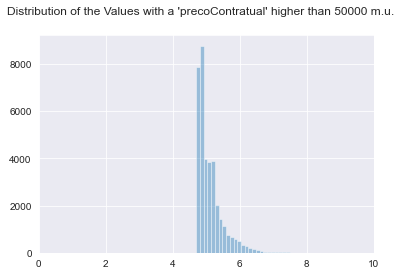

In [40]:
sns.set_style('darkgrid')

plt.suptitle("Distribution of the Values with a 'precoContratual' higher than 50000 m.u.")

plt.xlim(0,10)

sns.distplot(np.log10(list(filter(lambda x: x>50000, data['precoContratual'].values))),bins=30,kde=False)

# I can say that the values do not follow a normal distribution, like the values in 4.3.

<b>[Step 6. | 4 points ]</b> Next, and in the spirit of a vast scientific literature on Urban Scaling Laws (https://tinyurl.com/y8ohmzx7), let us investigate the relationship between the number and value of procurements issued by municipalities and their population size.

To that end we will need to download and load an additional dataset that includes the population size of each municipality. You can find the population data in the following link https://tinyurl.com/y9snl933. <br>
This dataset was obtained from the portal pordata. As is the case in many data science projects we don't have a perfect matching key between the population data and the procurement data we have been working so far. 

1. Download the file popsize.csv from https://tinyurl.com/y9snl933 and load it to a dataframe. Explore the dataframe and explain how can you link this data to the procurement data.

In [41]:
popsize = pd.read_csv("popsize.csv",sep=';')

# Remove the blank spaces in all values in 'Population' in order to convert 'PopulationSize' in step 6.2 to int.
popsize['Population'] = popsize['Population'].str.replace(' ','')
popsize

,Location,Population
0,Arcos de Valdevez,22284
1,Caminha,16465
2,Melgaço,8874
3,Monção,18931
4,Paredes de Coura,9039
...,...,...
303,Ribeira Brava,12961
304,Santa Cruz,43678
305,Santana,7338
306,São Vicente,5467


Explanation: As popsize and municipalities dataframes have the same length, we could concatenate popsize to the procurement data (only including the municipalities) in order to obtain the population size of each municipality (making a join on 'location' and 'issuerName') to then perform different analysis, such as if the most populated municipalities are the ones who issued the most services or if the less populated municipalities are the ones whose total values of the services are lower and other analysis related to the population size.

2. Create a new dataframe in which contracts are aggregated by municipality. You should have a dataframe in which the columns correspond to: NIF; Municipality Name; Population Size; Number of Issued Procurements; Total Value of Issued Procurements. Note you will have to merge at least two dataframes, and apply several aggregations.

In [42]:
# Delete all strings related to the word 'Município' in 'issuerName' in order to match those values in 'Location' in popsize,
# otherwise it is impossible to merge munic_proc and popsize.
munic_proc['issuerName'] = munic_proc['issuerName'].str.replace('Município de ','')
munic_proc['issuerName'] = munic_proc['issuerName'].str.replace('Município das ','')
munic_proc['issuerName'] = munic_proc['issuerName'].str.replace('Município do ','')
munic_proc['issuerName'] = munic_proc['issuerName'].str.replace('Município da ','')
munic_proc['issuerName'] = munic_proc['issuerName'].str.replace('Município dos ','')

# merge munic_proc and popsize using 'issuerName' and 'Location' as keys, therefore having assigned to each municipality the
# correct population size.
munic_proc = munic_proc.merge(popsize, left_on = 'issuerName', right_on = 'Location', how = 'inner')
munic_proc.head()

,idcontrato,nAnuncio,tipoContrato,tipoprocedimento,objectoContrato,dataPublicacao,dataCelebracaoContrato,precoContratual,prazoExecucao,localExecucao,...,cpvDOC,CPV,issuerNIF,supplierNIF,supplierName,pricePerDay,avgPricePerDay,issuerName,Location,Population
0,85378,4227/2009,Aquisição de serviços,Concurso público,Prestação de Serviços para Elaboração do Plano de Urbanização do Areal Gordo,2012-02-21,2012-02-13,103000.00,550,"Portugal, Faro, Faro",...,79421200,"- - Serviços de concepção de projectos, excepto projectos de construção",506579425,507358830 508371970,"- Land Design -Paisagismo e Ambiente Ldª. | - Site Plan - Consultores em Planeamento e Urbanismo, Lda.",187.272727,inf,Faro,Faro,62015
1,306651,2063/2011,Concessão de serviços públicos,Concurso público,"Concessão de exploração de estacionamento nas zonas de estacionamento de duração limitada da cidade de Faro, incluindo o fornecimento, instalação ...",2012-02-16,2012-02-01,0.00,2610,"Portugal, Faro, Faro",...,63712400,- - Serviços de estacionamento,506579425,503496553,"- Masitrave, Lda",0.000000,373.751670,Faro,Faro,62015
2,339619,3183/2011,Outros,Concurso público,Fornecimento contínuo de produtos químicos para a desinfeção e limpeza dos planos de água das piscinas municipais de faro e das fontes ornamentais...,2012-03-16,2012-02-08,27208.00,730,"Portugal, Faro, Faro",...,98300000,- - Serviços diversos,506579425,504486799,"- Sagilab-Laboratório de Análise Técnicas,SA",37.271233,183.588435,Faro,Faro,62015
3,339620,3183/2011,Outros,Concurso público,Fornecimento contínuo de produtos químicos para a desinfeção e limpeza dos planos de água das piscinas municipais de faro e das fontes ornamentais...,2012-03-16,2012-02-20,20733.30,730,"Portugal, Faro, Faro",...,39830000,- - Produtos de limpeza,506579425,506565165,"- Prodyalca - Comércio de Produtos Químicos, Ldª",28.401781,317.721220,Faro,Faro,62015
4,339621,3183/2011,Outros,Concurso público,Fornecimento contínuo de produtos químicos para a desinfeção e limpeza dos planos de água das piscinas municipais de faro e das fontes ornamentais...,2012-03-16,2012-03-05,62595.82,730,"Portugal, Faro, Faro",...,24962000,- - Produtos químicos para tratamento da água,506579425,500076219,"- Certikin Portugal, Lda",85.747699,225.404410,Faro,Faro,62015


In [43]:
Total_value = munic_proc.groupby('issuerName').sum()['precoContratual'] # Total value of issued procurements for each munipality

In [44]:
Num_proc = munic_proc.groupby('issuerName').count()['idcontrato'] # Number of issued procurements for each munipality

In [45]:
NIF = munic_proc.groupby('issuerName')['issuerNIF'].unique() # NIF for each munipality

In [46]:
Pop = munic_proc.groupby('issuerName')['Population'].unique() # Population for each munipality

In [47]:
# create a new Dataframe which holds the values from the varaiables created above: 'NIF', 'Pop', 'Num_proc' and 'Total_value'.
new_munic_proc = pd.DataFrame(data = {'NIF': NIF,'PopulationSize': Pop, 'NumberIssuedProcurements': Num_proc,'TotalValueProcurements': Total_value})

# set the index as numbers and include the 'MunicipalityName' as a column of the dataframe
new_munic_proc.reset_index(inplace=True)
new_munic_proc.rename(columns = {'issuerName':'MunicipalityName'},inplace=True)

# set 'NIF' and 'PopulationSize' as int in order to make use of their values for further data analysis.
new_munic_proc['NIF'] = new_munic_proc['NIF'].astype(int)
new_munic_proc['PopulationSize'] = new_munic_proc['PopulationSize'].astype(int)

new_munic_proc.head()

,MunicipalityName,NIF,PopulationSize,NumberIssuedProcurements,TotalValueProcurements
0,Abrantes,502661038,37895,238,11269275.85
1,Aguiar da Beira,506809307,5266,186,8017837.95
2,Alandroal,506772527,5634,142,5038549.85
3,Albergaria-a-Velha,506783146,24816,227,12055375.58
4,Albufeira,503539473,40119,207,30943785.60


3. It is common to compare not the absolute values of the different dimensions but their Logarithm. In that sense, create three new columns in your dataframe that correspond to the Logarithm base 10 of the Total Value of Issue Procurements; Number of Issued Procurements; and Population Size.

In [48]:
new_munic_proc['TotalValueProcurements_log10'] = np.log10(new_munic_proc['TotalValueProcurements'])
new_munic_proc['NumberIssuedProcurements_log10'] = np.log10(new_munic_proc['NumberIssuedProcurements'])
new_munic_proc['PopulationSize_log10'] = np.log10(new_munic_proc['PopulationSize'])
new_munic_proc

,MunicipalityName,NIF,PopulationSize,NumberIssuedProcurements,TotalValueProcurements,TotalValueProcurements_log10,NumberIssuedProcurements_log10,PopulationSize_log10
0,Abrantes,502661038,37895,238,1.126928e+07,7.051896,2.376577,4.578582
1,Aguiar da Beira,506809307,5266,186,8.017838e+06,6.904057,2.269513,3.721481
2,Alandroal,506772527,5634,142,5.038550e+06,6.702306,2.152288,3.750817
3,Albergaria-a-Velha,506783146,24816,227,1.205538e+07,7.081181,2.356026,4.394732
4,Albufeira,503539473,40119,207,3.094379e+07,7.490573,2.315970,4.603350
...,...,...,...,...,...,...,...,...
296,Vouzela,506770664,10282,121,5.784883e+06,6.762295,2.082785,4.012078
297,Águeda,501090436,47249,334,2.526334e+07,7.402491,2.523746,4.674393
298,Évora,504828576,55339,119,5.340115e+06,6.727551,2.075547,4.743031
299,Ílhavo,506920887,38456,162,8.759921e+06,6.942500,2.209515,4.584964


4. Compute the pearson correlation between the the Logarithms of the Population Size of each municipality with the Total Value of Issued Procurements and the Total Value of Issued Procurements. Make a scatter plot for each relationship to assess the identified relationship.

In [49]:
pearson_corr_1 = np.corrcoef(new_munic_proc.PopulationSize_log10,new_munic_proc.NumberIssuedProcurements_log10)[0][1]

pearson_corr_2 = np.corrcoef(new_munic_proc.PopulationSize_log10,new_munic_proc.TotalValueProcurements_log10)[0][1]

print("The Pearson Correlation between the Logarithms of the Population Size of each municipality with the Logarithms of the Total Number of Issued Procurements is: "+str(pearson_corr_1)+"\nThe Pearson Correlation between the Logarithms of the Population Size of each municipality with the Logarithms of the Total Value of Issued Procurements is: "+str(pearson_corr_2))

The Pearson Correlation between the Logarithms of the Population Size of each municipality with the Logarithms of the Total Number of Issued Procurements is: 0.7049608469632707
The Pearson Correlation between the Logarithms of the Population Size of each municipality with the Logarithms of the Total Value of Issued Procurements is: 0.7706894865582673


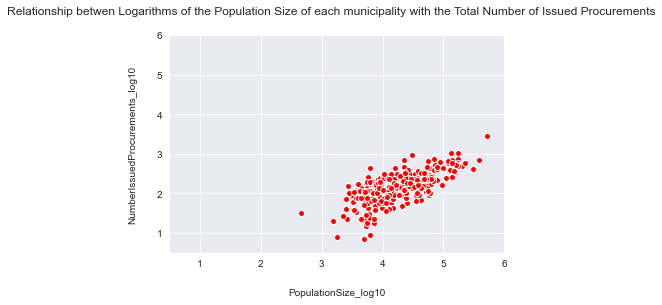

In [50]:
# Determines the limits of the x and y axes, respectively. I used those values because I think those are the ones which suit the
# best to the data.
plt.xlim(0.5,6)
plt.ylim(0.5,6)

plt.suptitle('Relationship betwen Logarithms of the Population Size of each municipality with the Total Number of Issued Procurements')

plt.xlabel('PopulationSize_log10',labelpad = 20)
plt.ylabel('NumberIssuedProcurements_log10',labelpad = 20)

# plots a scatter plot, showing the relationship between PopulationSize_log10 and Value_issued_procurements_per_capita_log10.
# edgecolors = white to better understand the positions of each observation in the plot.
plt.scatter(new_munic_proc.PopulationSize_log10,new_munic_proc.NumberIssuedProcurements_log10,edgecolors = 'white',c = 'red')

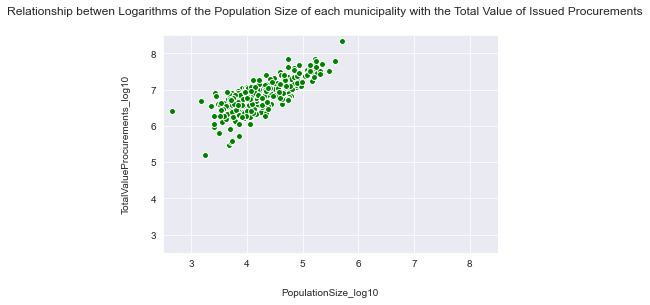

In [51]:
plt.xlim(2.5,8.5)
plt.ylim(2.5,8.5)

plt.suptitle('Relationship betwen Logarithms of the Population Size of each municipality with the Total Value of Issued Procurements')

plt.xlabel('PopulationSize_log10',labelpad = 20)
plt.ylabel('TotalValueProcurements_log10',labelpad = 20)

plt.scatter(new_munic_proc.PopulationSize_log10,new_munic_proc.TotalValueProcurements_log10,edgecolors = 'white',c = 'green')

5. Can you build a linear model using the library Statsmodel that regresses the Logarithms of the Total Value of issued procurements as a funcion of the population size? What is the coefficient that you find? <br>
**Tip:** You might to to look for some inspiration in the final part of Lab 7

The coefficient of PopulationSize_log10 is: const                          -1.870
TotalValueProcurements_log10    0.892
dtype: float64


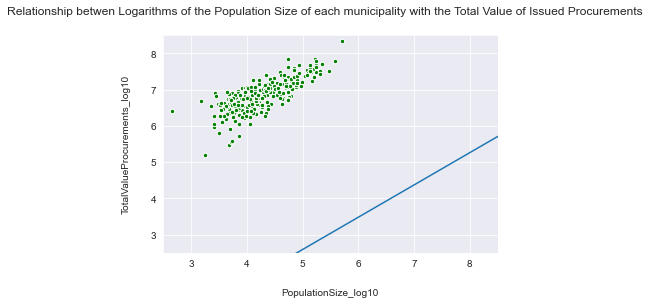

In [52]:
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import abline_plot

# Use the OLS estimation to build a model which minimizes the sum of squared residuals 
# (a regression of the type y = βx + constant)
model_1 = sm.OLS(new_munic_proc.PopulationSize_log10, sm.add_constant(new_munic_proc.TotalValueProcurements_log10))
coef_PopulationSize_log10 = model_1.fit().params

# a scatter plot between PopulationSize_log10 and TotalValueProcurements_log10
ax_1 = new_munic_proc.plot(x='PopulationSize_log10', y='TotalValueProcurements_log10', kind='scatter',edgecolors = 'white',color = 'g')

# the abline_plot method draws the linear regression which best fits the data, so minimizes the sum of squared residuals,
# because the abline_plot uses model_1 to fit the data. ax determines the plot in where the linear regression is to be drawn.
abline_plot(model_results=model_1.fit(), ax=ax_1)

plt.xlim(2.5,8.5)
plt.ylim(2.5,8.5)

plt.suptitle('Relationship betwen Logarithms of the Population Size of each municipality with the Total Value of Issued Procurements')

plt.xlabel('PopulationSize_log10',labelpad = 20)
plt.ylabel('TotalValueProcurements_log10',labelpad = 20)

print("The coefficient of PopulationSize_log10 is: "+str(round(coef_PopulationSize_log10,3)))

6. What if instead of the Total Value of issued procurments you had the Value per capita (per capita means per person in the local population)? How would that impact the results in points 6.4 and 6.5?<br>


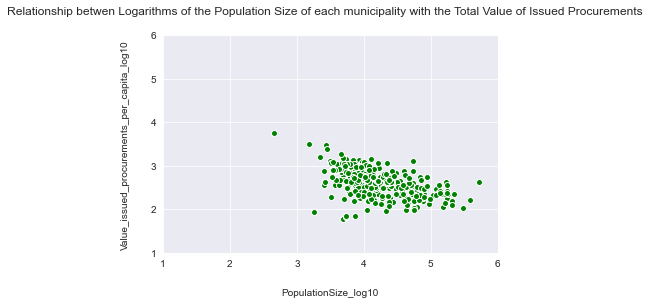

In [53]:
# I decide to compare the logs of PopulationSize and Value_issued_procurements_per_capita because the scales of both variables
# are too different from each other, so we have a better understanding of their relationship.

new_munic_proc['Value_issued_procurements_per_capita'] = new_munic_proc['TotalValueProcurements'] / new_munic_proc['PopulationSize']
new_munic_proc['Value_issued_procurements_per_capita_log10'] = np.log10(new_munic_proc['Value_issued_procurements_per_capita'])

plt.xlim(1,6)
plt.ylim(1,6)

plt.suptitle('Relationship betwen Logarithms of the Population Size of each municipality with the Total Value of Issued Procurements')

plt.xlabel('PopulationSize_log10',labelpad = 20)
plt.ylabel('Value_issued_procurements_per_capita_log10',labelpad = 20)

plt.scatter(new_munic_proc.PopulationSize_log10,new_munic_proc.Value_issued_procurements_per_capita_log10, edgecolors = 'white',c = 'green')

Text(37.375, 0.5, 'Value_issued_procurements_per_capita_log10')

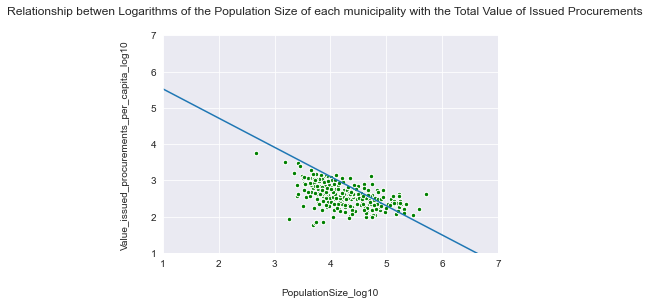

In [54]:
# same explanation as question 6.5

model_2 = sm.OLS(new_munic_proc.PopulationSize_log10, sm.add_constant(new_munic_proc.Value_issued_procurements_per_capita_log10))

ax_2 = new_munic_proc.plot(x='PopulationSize_log10', y='Value_issued_procurements_per_capita_log10', kind='scatter',edgecolors = 'white',color = 'g')

abline_plot(model_results=model_2.fit(), ax=ax_2)

plt.xlim(1,7)
plt.ylim(1,7)

plt.suptitle('Relationship betwen Logarithms of the Population Size of each municipality with the Total Value of Issued Procurements')

plt.xlabel('PopulationSize_log10',labelpad = 20)
plt.ylabel('Value_issued_procurements_per_capita_log10',labelpad = 20)

In [55]:
pearson_corr_3 = np.corrcoef(new_munic_proc.PopulationSize_log10,new_munic_proc.Value_issued_procurements_per_capita_log10)[0][1]
pearson_corr_3

# Comparing the results obtained with the Total Value of issued procurements and the Value per capita of issued procurements, we
# can see that the relationship between those variables and PopulationSize_log10 is different: while the Total Value of issued 
# procurements has a strong positive correlation with PopulationSize_log10, the Value_issued_procurements_per_capita_log10 has a
# strong negative correlation with PopulationSize_log10. Therefore, when PopulationSize_log10 increases, the Total Value of
# issued procurements increases, while the Value_issued_procurements_per_capita_log10 decreases.

-0.5186886888363973

<b>[Step 7. | 2 point ]</b> Open Question. <br>
Given the dataset you have been exploring, and the analysis conducted over the municipalities procurement dataset with the population data. Can you think about a question that you consider interesting to explore? Does it require obtain additional from, for instace, pordata?

On this final step you have full control. Be creative and show us your ability to raise a question, identify which data you require to explore it, and report the results. Be as objective and clear as possible with your answer.

Use as many cells as necessary.

In [56]:
# What is the relationship between the Number of Issued Procurements per capita and the Population Size? 

In [57]:
new_munic_proc['Number_issued_procurements_per_capita'] = new_munic_proc['NumberIssuedProcurements'] / new_munic_proc['PopulationSize']
new_munic_proc['Number_issued_procurements_per_capita_log10'] = np.log10(new_munic_proc['Number_issued_procurements_per_capita'])

The coefficient of PopulationSize_log10 is: -0.915


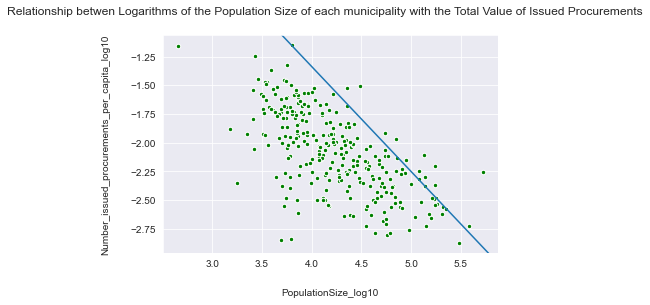

In [58]:
model_3 = sm.OLS(new_munic_proc.PopulationSize_log10, sm.add_constant(new_munic_proc.Number_issued_procurements_per_capita_log10))

ax_3 = new_munic_proc.plot(x='PopulationSize_log10', y='Number_issued_procurements_per_capita_log10', kind='scatter',edgecolors = 'white',color = 'g')
coef_PopulationSizelog10 = model_3.fit().params

abline_plot(model_results=model_3.fit(), ax=ax_3)

# plt.xlim(2,7)
# plt.ylim(-4,7)

plt.suptitle('Relationship betwen Logarithms of the Population Size of each municipality with the Total Value of Issued Procurements')

plt.xlabel('PopulationSize_log10',labelpad = 20)
plt.ylabel('Number_issued_procurements_per_capita_log10',labelpad = 20)

print("The coefficient of PopulationSize_log10 is: "+str(round(coef_PopulationSizelog10[1],3)))

In [59]:
# The population size and the number of issued procurements per capita have a very strong positive correlation, thus as the 
# population size increases, the number of issued procurements per capita tends to decrease.

In [60]:
# Which are the 5 municipalities with the highest Number of Issued Procurements? Those are the same which have the highest 
# number of procurements per capita? If different, can you say there is a significant difference in population size between 
# those two groups?

In [61]:
new_munic_proc.groupby('MunicipalityName')['NumberIssuedProcurements'].max().sort_values(ascending=False).head(5)

MunicipalityName
Lisboa                    2895
Oeiras                    1076
Vila Nova de Famalicão    1057
Lagos                      957
Loulé                      742
Name: NumberIssuedProcurements, dtype: int64

In [62]:
new_munic_proc.groupby('MunicipalityName')['Number_issued_procurements_per_capita'].max().sort_values(ascending=False).head(5)

MunicipalityName
Portel      0.070603
Corvo       0.070175
Alcoutim    0.056780
Aljezur     0.047201
Gavião      0.043312
Name: Number_issued_procurements_per_capita, dtype: float64

In [63]:
new_munic_proc.groupby('PopulationSize')['NumberIssuedProcurements'].max().sort_values(ascending=False).head(5)

PopulationSize
520549    2895
172689    1076
133843    1057
30748      957
69508      742
Name: NumberIssuedProcurements, dtype: int64

In [64]:
new_munic_proc.groupby('PopulationSize')['Number_issued_procurements_per_capita'].max().sort_values(ascending=False).head(5)

PopulationSize
6317    0.070603
456     0.070175
2677    0.056780
5699    0.047201
3925    0.043312
Name: Number_issued_procurements_per_capita, dtype: float64

In [65]:
# The municipalities with the highest Number of Issued Procurements are not the same as the municipalities with the highest 
# number of procurements per capita. At the same time, I can say those two groups of municipalities have a very distinct
# population size, as the municipalities with the highest Number of Issued Procurements have a much higher population 
# size when compared to that of the municipalities with the highest number of procurements per capita.

## End

Submit this notebook in Moodle along with a statement of authorship in a single .zip archive.